# Non-Private Pixelation with Noise

In [1]:
import random
import numpy as np
import sys

In [2]:
sys.path.insert(0,"../src")

import image_util as iu
import dataset as db
from np_pixel import np_pixelate
from scale import Scale
from noise import Noise

In [3]:
scale_f = Scale.pad_and_pixelate
noise_f = Noise.add_laplace_noise

In [4]:
def load(dataset, n=16):
    images = dataset.load_images(n)
    iu.display_image_grid(images)
    return images

In [5]:
def np_pixelate_images(images, target_h, target_w, control):
    noisy_images = [np_pixelate(I,target_h, target_w, control, scale_f=scale_f, noise_f=noise_f) for I in images]
    iu.display_image_grid(noisy_images)

In [6]:
def vary_control(images, target_h, target_w, start, end, step):
    I = random.choice(images)
    control_vals = np.arange(start,end+step,step)
    noisy_images = [np_pixelate(I, target_h, target_w, control, scale_f=scale_f, 
                                noise_f=noise_f) for control in control_vals]
    titles=["{:.1f}".format(control) for control in control_vals]
    iu.display_image_grid(noisy_images, titles=titles)

# AT&T Faces Dataset

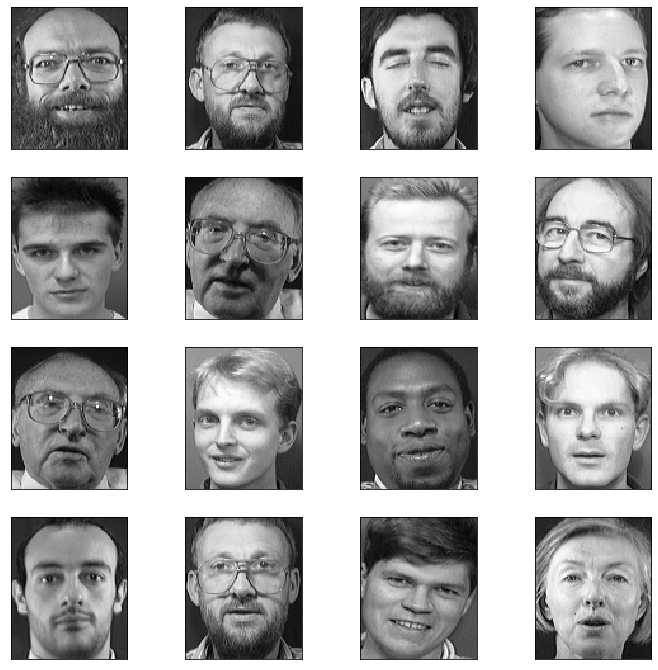

In [7]:
faces = load(db.FacesDataset())

## Set the parameters

In [8]:
target_h = 28 
target_w = 23
control = 0.1

## NP Pixelated Images

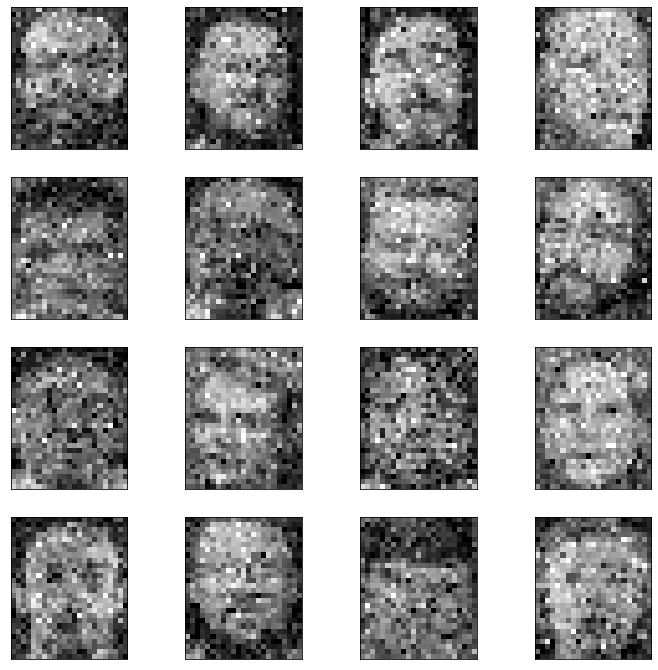

In [9]:
np_pixelate_images(faces, target_h,target_w, control)

## Increasing Noise ($ 0.0 \rightarrow 1.0 \text{ by } 0.1$)

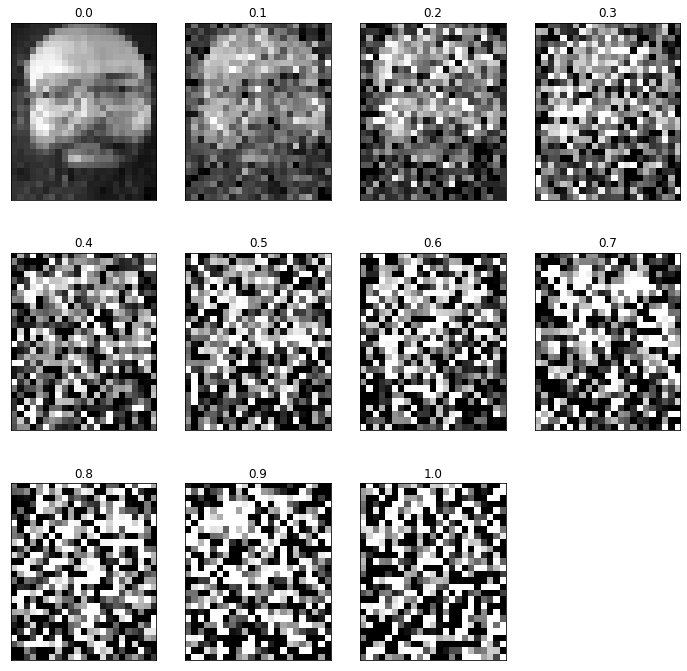

In [10]:
vary_control(faces, target_h,target_w, 0, 1, 0.1)

# ImageNet Dataset

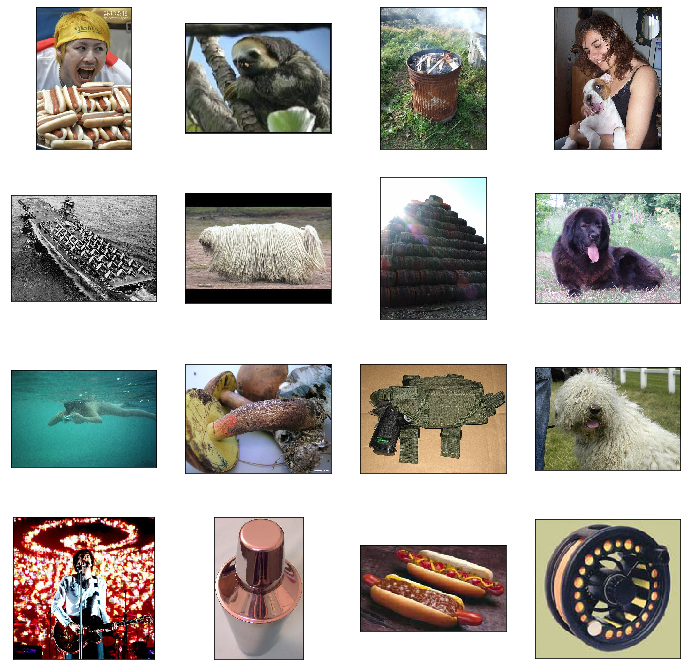

In [11]:
objects = load(db.MiniImageNetDataset())

## Set the parameters

In [12]:
target_w = 84
target_h = 84
control = 0.5

## NP Pixelated Images

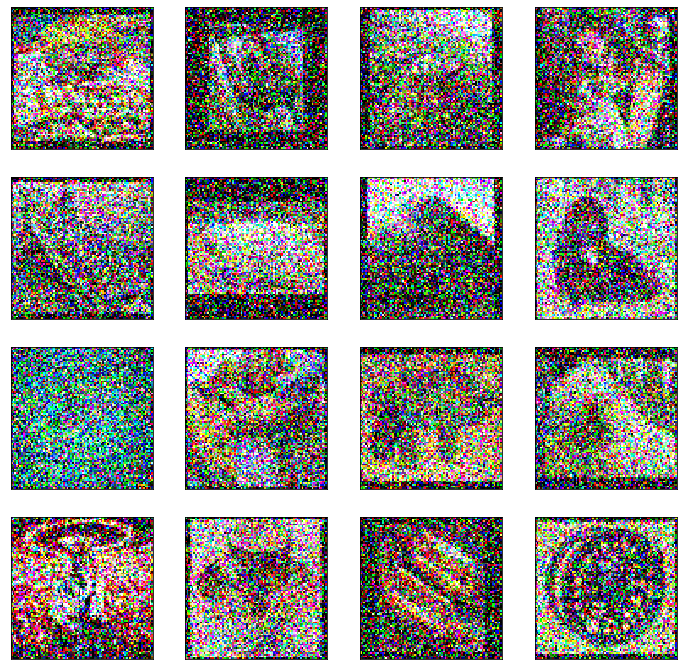

In [13]:
np_pixelate_images(objects, target_h,target_w, control)

### Increasing Noise ($ 0.0 \to 1 \text{ by } 0.1$) 

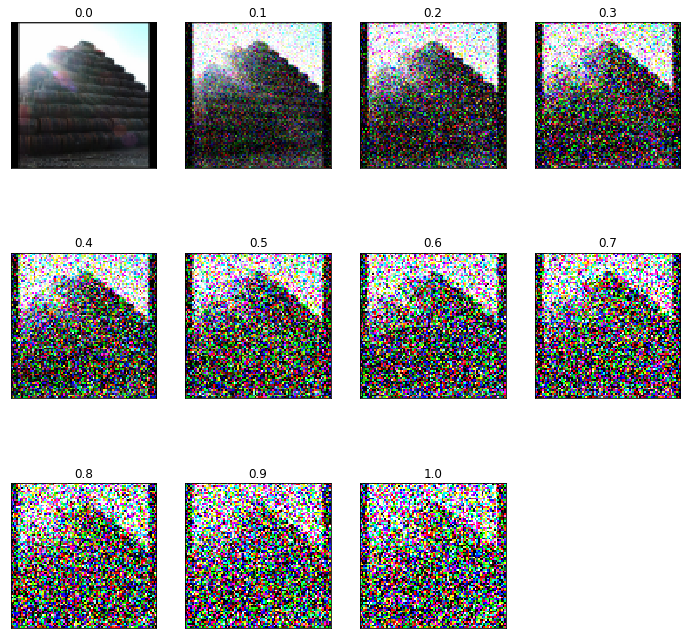

In [14]:
vary_control(objects, target_h,target_w, 0, 1, 0.1)

# Omniglot Dataset

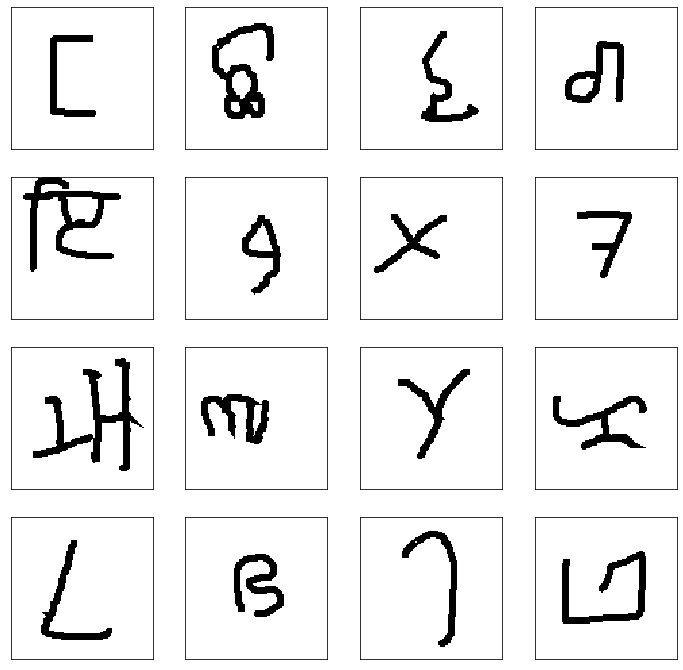

In [15]:
characters = load(db.OmniglotDataset())

## Set the parameters

In [16]:
target_w = 28
target_h = 28
control = 0.1

## NP Pixelated Images

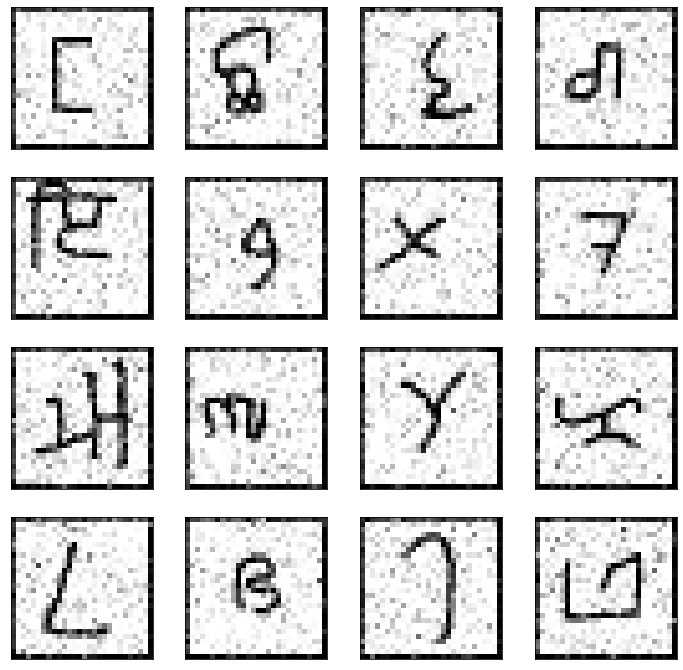

In [17]:
np_pixelate_images(characters, target_h,target_w, control)

### Increasing Noise ($ 0.0 \to 1 \text{ by } 0.1$) 

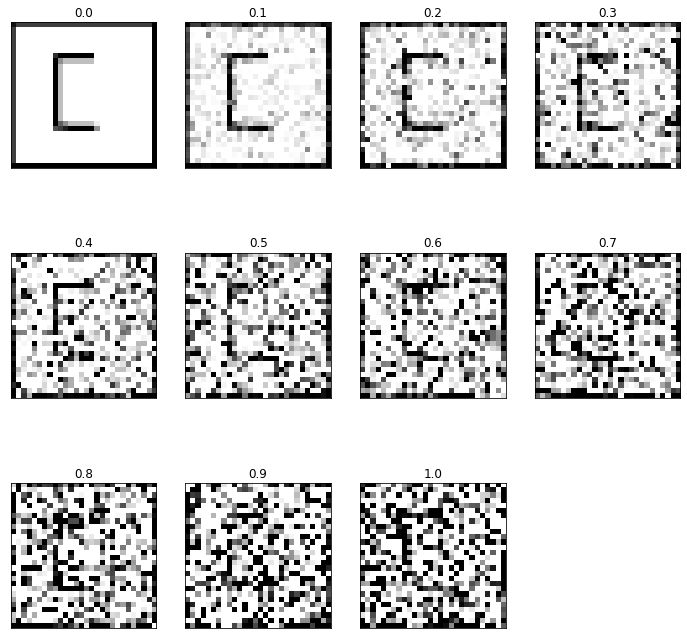

In [18]:
vary_control(characters, target_h,target_w, 0, 1, 0.1)